## Web Scraping and Linear Regresion to predict house prices

##### In this program we'll do Web Scrapping to fetch all the data of a Website that offers houses in Mexico City, then we'll do data cleaning and finally we will do statistics calculus to obtain the linear regression and the prediction of the price of a house.

**Caution** *The website may be changing with different offers and different houses, so if you run this program in the future will be different*

#### Import the necessary libraries to make web scrapping and the linear regression

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

- Do web scrappping by getting all the data from the website through the HTML
- Print the HTMl to see the information

In [2]:
direction="https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico-alvaro-obregon"
website=requests.get(direction)
soup=BeautifulSoup(website.content,"html.parser")
#print(soup.prettify())

#### Data Cleaning
- Save all the elements that have the prices, this is done by obtaining only the elements that have a certain class.

In [3]:
data=soup.find_all('p',class_="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base")
print(data)

prices=list()
for x in data:
    prices.append(x.text.split('$')[1])
prices

[<p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$2,665,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$2,750,000</span></p>, <p class="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"><span>$2,520,000</span><span class="truncate text-xs text-dark-grey-1 line-through">$2,820,000</span><span class="flex items-center"><button aria-controls="radix-:R6v3ib8t6:" aria-expanded="false" aria-haspopup="dialog" class="c-hYUCgx focus:outline-none" data-state="closed" type="button"><span class="flex items-baseline gap-[0.125rem] font-source text-xs font-bold text-coral md:text-xs"><svg fill="#ff5a5a" height="8" viewbox="0 0 512 512" width="8" xmlns="http://www.w3.org/2000/svg"><polygon points="64 144 256 368 448 144 64 144"></polygon></svg> <!-- -->1

['2,665,000',
 '2,750,000',
 '2,520,000',
 '2,650,000',
 '4,900,000',
 '6,900,000',
 '2,345,000',
 '2,750,000',
 '2,750,000',
 '2,750,000',
 '2,345,000',
 '4,300,000',
 '2,550,000',
 '2,350,000',
 '2,100,000',
 '1,650,000',
 '3,050,000',
 '2,650,000',
 '2,650,000',
 '2,500,000']

In [4]:
# Convert the prices from string to int
for x in range(len(prices)):
  prices[x]= prices[x].replace(',', '')
  prices[x]= prices[x].split(" ")
  prices[x]=prices[x][0]
  prices[x] = int(prices[x])
prices

[2665000,
 2750000,
 2520000,
 2650000,
 4900000,
 6900000,
 2345000,
 2750000,
 2750000,
 2750000,
 2345000,
 4300000,
 2550000,
 2350000,
 2100000,
 1650000,
 3050000,
 2650000,
 2650000,
 2500000]

- Save all the elements that have other relevant information of the house sucha asthe size and the number of bathrooms, this is done by obtaining only the elements that have a certain class.

In [5]:
data=soup.find_all ('span', class_="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black")
#size, bathroom, rooms and garage have the same class
for d in data:
  print(d)

<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">86 m²</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">2</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">2</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">1</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">4.5</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">113 m²</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">2</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">1</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">3</span>
<span class="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black">4.6</span>
<span class="ml-2 truncate font-monts

- Since  the sizes, bathrooms, rooms and garage have the same class we can do a data cleaning with a cycle and separate them in different lists

In [6]:
sizes, rooms, bathrooms, garage = [], [], [], []
i=-1
for d in data:
  i+=1
  if('.' in d.text):
    i=-1
  if('m²' in d.text):
    sizes.append(int(d.text.split()[0]))
  elif(i==1):
    rooms.append(int(d.text))
  elif(i==2):
    bathrooms.append(int(d.text))
  elif(i==3):
    garage.append(int(d.text))

In [7]:
print('sizes ---> ', sizes)
print('rooms ---> ', rooms)
print('bathrooms ---> ', bathrooms)
print('garage ---> ', garage)

sizes --->  [86, 113, 76, 82, 335, 511, 74, 71, 73, 70, 81, 125, 60, 55, 60, 55, 71, 55, 70, 65]
rooms --->  [2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 3, 3]
bathrooms --->  [2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2]
garage --->  [1, 3, 1, 1, 5, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1]


- Check that all the lists have the same size so we do a correct data cleaning

In [8]:
print(len(prices))
print(len(sizes))
print(len(bathrooms))
print(len(rooms))
print(len(garage))

20
20
20
20
20


#### Correlation Coeficient
- Get the correlation coeficients of the prices with all the other aspect of the houses to know which one has a better correlation with the prices and make the best linear regression

In [9]:
print("Correlation Coeficients\n")
print('Bathrooms and Prices:',np.corrcoef(bathrooms, prices)[0][1], "\nSizes and Prices", np.corrcoef(sizes, prices)[0][1],)
print('Rooms and Prices',np.corrcoef(rooms, prices)[0][1], '\nGarage and Prices', np.corrcoef(garage, prices)[0][1])

Correlation Coeficients

Bathrooms and Prices: 0.527228222749548 
Sizes and Prices 0.9430188876600533
Rooms and Prices 0.0289432236089028 
Garage and Prices 0.587747566188347


#### Linear Regression
- We can see that in this example the one with the best correlation coeficient is the one of he sizes and prices with a value of **0.94** out of 1, which is pretty good; so we will use the size to predict the price
- Make a linear regression without libraries to have a better understanding of this one

In [10]:
sx, sy, sx2, sxy = 0, 0, 0, 0
n=len(prices)

for i in range(n):
  sx+=sizes[i]
  sy+=prices[i]
  sx2+=sizes[i]**2
  sxy+=sizes[i]*prices[i]

b1=((n*sxy)-(sx*sy)) / ((n*sx2) - (sx**2))
b0=(sy-(b1*sx))/n

print('Intercept: ', b0, 'Pending: ',b1)

Intercept:  1886639.0227684062 Pending:  9777.06560540762


- Create the Linear Regression

In [11]:
Y=[]
for i in range(n):
  Y.append(b1*sizes[i]+b0)

#### Plot the house sizes with their prices and the Linear Regression

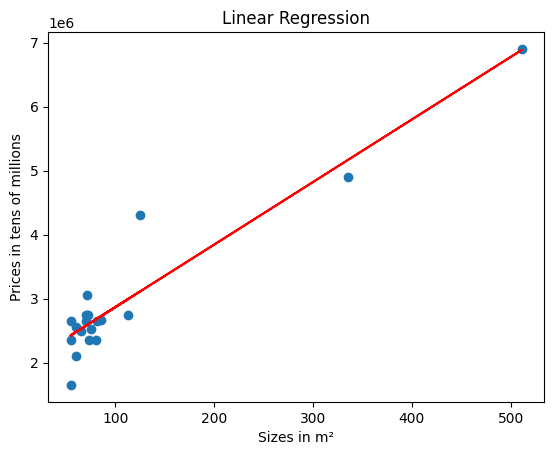

In [12]:
plt.xlabel('Sizes in m²')
plt.ylabel('Prices in tens of millions')
plt.title('Linear Regression')
plt.scatter(sizes, prices)
plt.plot(sizes, Y, color='r')
plt.show()

#### Make the Prediction of a house of 150 square meters in Mexico City

In [13]:
x=250
print("The estimated value of a property of 150 square meters is about:$", round((b1*x)+b0,2), "mexican pesos")

The estimated value of a property of 150 square meters is about:$ 4330905.42 mexican pesos


#### As we could see this Web Scrapping combined with a linear regression to make a price prediction is very helpful to start doing data analysis.